# Web Scraping Demo

Web scraping, sometimes referred to as web harvesting or web data extraction, is the process of extracting data from websites. Websites hold many pieces of information that could be of great value to data scientists, and web scraping a good technique that can retrieve the information.

If you ever copy-pasted sections of a web page, that technically qualifies as an instance of web scraping! There are different techniques to mining data from websites, like using the `grep` command on UNIX, making POST requests to (static) web pages, using ML and computer vision to have machines read and interpret data like humans, and our good friend of manual copy-paste. However, in this notebook, we will cover one of the most common techniques: HTML Parsing.

**NOTE:** Though web scraping is a good way to retrieve information, the legality of web scraping is somewhat of a grey area. Though many website owners permit the use of web scraping on their pages, website owners can claim legal grounds against web scraping, primarily those surrounding copyright infrigement and trespassing to chattel. All code presented is for educational and demonstration purposes, please act responsibly when performing web scraping.

## Imports + HTML Parsing

For today, we'll just be covering HTML Parsing. Since the modern web is built on the back of HTML, we can parse through the different tags to get the information we desire. This is also nice since most websites, even if they look elaboratly designed, might have patterns in the data that allow them to read data very easily. To demonstrate this, our first example will use one of the most popular websites on the Internet: Wikipedia.

We begin by importing two libraries useful to us:
* The `requests` package allows us to make GET/POST/etc. calls to websites. This command is also highly useful if you're making API calls (though retrieving data from APIs is beyond the scope of today's workshop).
* The `bs4` package contains the `BeautifulSoup` module, which allows us to parse through HTML or XML files.

In [2]:
# You may need to run the commands below to install the packages on your computer
! pip install requests
! pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=3d45b83ea9c5978d3b2de2a66c2343777a99c4dfd8444381b9c2a284b006095e
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [2]:
import requests
from bs4 import BeautifulSoup

Let's go ahead and make a call to a Wikipedia page. The code below retrieves the HTML of the Wikipedia page for Texas A&M.

In [7]:
response = requests.get('https://en.wikipedia.org/wiki/Texas_A%26M_University')
if response.status_code == 200:
  print(f"URL: {response.url}")
  print(f"HEADERS: {response.headers}")
  print(f"CONTENTS:\n{response.text}")
else:
    print("Request failed with status code:", response.status_code)
    response.raise_for_status()

URL: https://en.wikipedia.org/wiki/Texas_A%26M_University
HEADERS: {'date': 'Thu, 07 Sep 2023 04:01:46 GMT', 'server': 'mw1349.eqiad.wmnet', 'x-content-type-options': 'nosniff', 'content-language': 'en', 'accept-ch': '', 'vary': 'Accept-Encoding,Cookie', 'last-modified': 'Thu, 07 Sep 2023 03:59:01 GMT', 'content-type': 'text/html; charset=UTF-8', 'content-encoding': 'gzip', 'age': '50861', 'x-cache': 'cp1083 hit, cp1079 hit/23', 'x-cache-status': 'hit-front', 'server-timing': 'cache;desc="hit-front", host;desc="cp1079"', 'strict-transport-security': 'max-age=106384710; includeSubDomains; preload', 'report-to': '{ "group": "wm_nel", "max_age": 604800, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'nel': '{ "report_to": "wm_nel", "max_age": 604800, "failure_fraction": 0.05, "success_fraction": 0.0}', 'set-cookie': 'WMF-Last-Access=07-Sep-2023;Path=/;HttpOnly;secure;Expi

Now, you might be intimidated to see *all* of that text coming back as our response. But hold on tight, I promise that it'll all make sense.

In order to take all of that HTML and make it make sense, we will want to use BeautifulSoup, which creates a parse tree on the HTML, which is highly useful for us doing web scraping. An example of calling BeautifulSoup to retrieve the web page's title can be seen below.

In [13]:
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.title)

<title>Texas A&amp;M University - Wikipedia</title>


We can do more than just getting the information! Let's say we want to reprint the first paragraph in the Wikipedia article.

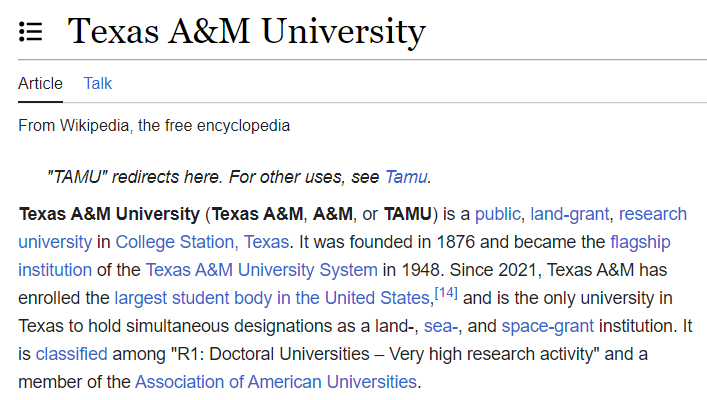

Admittedly, the HTML for the first paragraph is complicated, but we can use BeautifulSoup to get the text values fairly easily! This is because all of the main text in the Wikipedia articles uses paragraph tags, or `<p>`. Part of the HTML can be seen below.

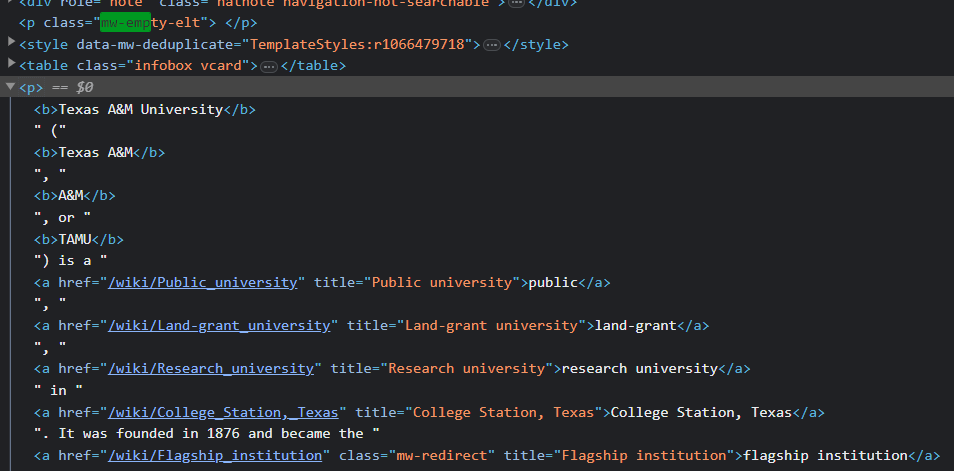

Therefore, we can make a call to find all `<p>` tags in the document, and we can see which instance contains the first paragraph. From there, we can get the text from that tag, extracting just the text, even if they're nested in other tags like bold `<b>` or links `<a>`.

In [17]:
# Find all paragraphs in the document, and print the first three instances.
paragraphs = soup.find_all('p')
for i in range(3):
  print(paragraphs[i])
print("...\n")

# Our first paragraph is in the second paragraph tag! Let's get the text and print it.
print(paragraphs[1].get_text())

<p class="mw-empty-elt">
</p>
<p><b>Texas A&amp;M University</b> (<b>Texas A&amp;M</b>, <b>A&amp;M</b>, or <b>TAMU</b>) is a <a href="/wiki/Public_university" title="Public university">public</a>, <a href="/wiki/Land-grant_university" title="Land-grant university">land-grant</a>, <a href="/wiki/Research_university" title="Research university">research university</a> in <a href="/wiki/College_Station,_Texas" title="College Station, Texas">College Station, Texas</a>. It was founded in 1876 and became the <a class="mw-redirect" href="/wiki/Flagship_institution" title="Flagship institution">flagship institution</a> of the <a href="/wiki/Texas_A%26M_University_System" title="Texas A&amp;M University System">Texas A&amp;M University System</a> in 1948. Since 2021, Texas A&amp;M has enrolled the <a class="mw-redirect" href="/wiki/List_of_United_States_university_campuses_by_enrollment" title="List of United States university campuses by enrollment">largest student body in the United States</a

Notice how when we call the function to find all paragraph tags in the document, it also gets all of the tags that are *inside* of that tag! Furthermore, notice how when we call the function `get_text()`, it gives us the text inside not just the `<p>` tags, but the text inside these other tags (such as the bold `<b>` tags at the start of the first sentence)! Pretty neat!

Let's do another exercise. Let's get all of the images from the Texas A&M Wikipedia page. We can do this by finding all image tags `<img>` within the page, and getting the source parameter `src`. An example of an image tag could look like this:
```
<img src="//upload.wikimedia.org/wikipedia/commons/thumb/5/55/WMA_button2b.png/17px-WMA_button2b.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/55/WMA_button2b.png/17px-WMA_button2b.png 1x, //upload.wikimedia.org/wikipedia/commons/thumb/5/55/WMA_button2b.png/34px-WMA_button2b.png 2x" class="wmamapbutton noprint" title="Show location on an interactive map" alt="" style="padding: 0px 3px 0px 0px; cursor: pointer;">
```

First, let's just get the URLs of these images.

In [18]:
img_tags = soup.find_all('img')

# Extract and print the image URLs
for img_tag in img_tags:
    img_url = img_tag.get('src')
    print(img_url)

/static/images/icons/wikipedia.png
/static/images/mobile/copyright/wikipedia-wordmark-en.svg
/static/images/mobile/copyright/wikipedia-tagline-en.svg
//upload.wikimedia.org/wikipedia/en/thumb/f/f7/Texas_A%26M_University_seal.svg/150px-Texas_A%26M_University_seal.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Texas_A%26M_University_wordmark.svg/170px-Texas_A%26M_University_wordmark.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/4/48/TAMU_Sul_Ross_statue.jpg/170px-TAMU_Sul_Ross_statue.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/7/7f/TexasA%26MCampus_1902.jpg/220px-TexasA%26MCampus_1902.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Keypunching_at_Texas_A%26M.jpg/220px-Keypunching_at_Texas_A%26M.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/George_Bush_Presidential_Library.jpg/220px-George_Bush_Presidential_Library.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/2/23/TAMUcampus.jpg/220px-TAMUcampus.jpg
//upload.wikimedia.org/wikipedia/comm

We got the URLs to the images, but we also have some images that are just default for Wikipedia (what you see whenever you go to any Wiki page), like the Wikipedia logo and wordmark. The images we're really interested in look like they start with `upload.wikimedia.org`. Let's get the first instance of this and display it!

Note that displaying images from URLs also requires more imports, make sure to call pip install if you don't have them already!

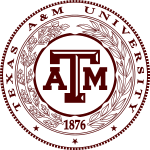

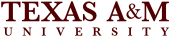

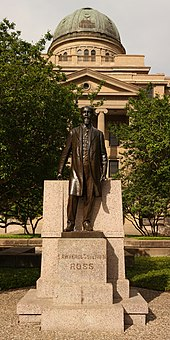

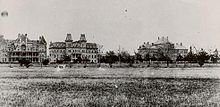

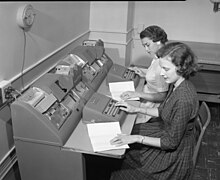

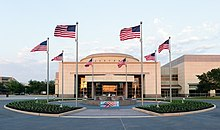

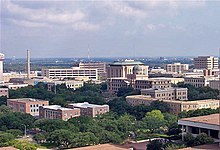

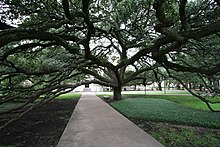

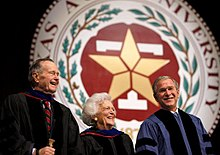

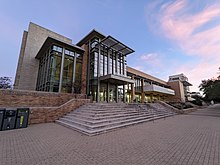

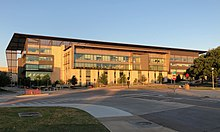

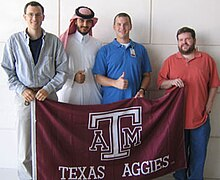

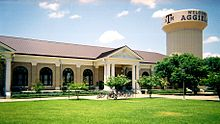

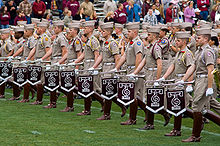

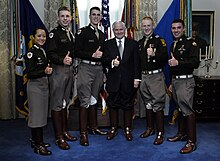

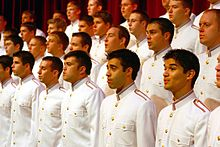

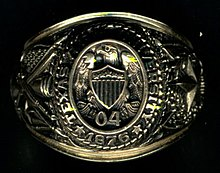

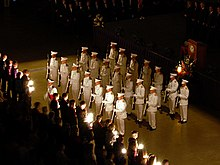

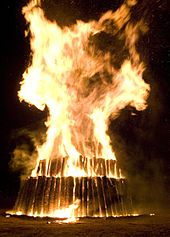

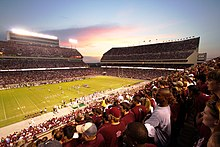

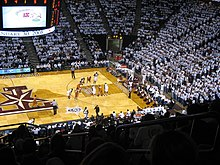

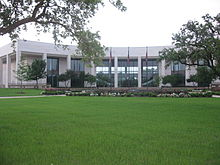

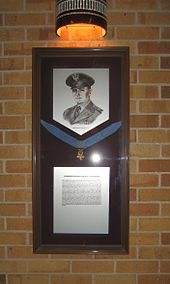

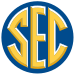

In [48]:
from io import BytesIO
from PIL import Image
import IPython.display as display

img_tags = soup.find_all('img')

# Extract image URLs
for img_tag in img_tags:
  img_url = img_tag.get('src')
  # If image URL begins with // (upload.wikimedia.org link), display image
  if img_url[:2] == "//":
    full_url = "https:" + img_url
    response = requests.get(full_url)
    img_data = BytesIO(response.content)
    img = Image.open(img_data)
    display.display(img)

OK, let's do one last exercise! This time, let's get all of the Wikipedia URLs within the Wikipedia article, and within the TAMU Wikipedia page and those URLs, let's find which Wikipedia pages get linked the most among them! This will be useful to us because it can gives us intel on pages that are relevant to TAMU.

Now, we don't want to get *all* links on the page (links to other sites like tamu.edu or to something like a Houston Chronicle article in the references section), much less all Wikipedia links (think about it: we don't really want to be counting links to the Wikipedia home page or an article's talk page and version history). We can look at the HTML and make the appropriate call to get *just* the HTML of the article itself. From there, we can select all links that have /wiki/[something] on them, since that links to other Wikipedia articles.

In [54]:
data = soup.find_all("div", class_="mw-body-content mw-content-ltr")
wiki_links = []
for div in data:
  links = div.select("a[href^='/wiki/']")
  for link in links:
      wiki_links.append(link)

for tag in wiki_links:
  print(tag)

<a class="mw-redirect mw-disambig" href="/wiki/Tamu_(disambiguation)" title="Tamu (disambiguation)">Tamu</a>
<a class="mw-file-description" href="/wiki/File:Texas_A%26M_University_seal.svg"><img class="mw-file-element" data-file-height="250" data-file-width="250" decoding="async" height="150" src="//upload.wikimedia.org/wikipedia/en/thumb/f/f7/Texas_A%26M_University_seal.svg/150px-Texas_A%26M_University_seal.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/f/f7/Texas_A%26M_University_seal.svg/225px-Texas_A%26M_University_seal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/f/f7/Texas_A%26M_University_seal.svg/300px-Texas_A%26M_University_seal.svg.png 2x" width="150"/></a>
<a href="/wiki/Public_university" title="Public university">Public</a>
<a href="/wiki/Land-grant_university" title="Land-grant university">land-grant</a>
<a href="/wiki/Research_university" title="Research university">research</a>
<a href="/wiki/United_States_senior_military_college" title="United St

We can first see what articles are the most linked *just* within the Texas A&M Wikipedia page. Let's do that real quick, and print all articles that have more than one link to their page. (Note that to do this, we want to look at the URLs, and not the text displayed, since the text on display can be changed across entries, but the URL stays the same for each page.)

In [62]:
links_dict = {}
for tag in wiki_links:
  href = tag.get('href')
  if href in links_dict:
    links_dict[href] += 1
  else:
    links_dict[href] = 1

sorted_dict = dict(sorted(links_dict.items(), key=lambda item: item[1], reverse=True))
for item in sorted_dict.keys():
  if(sorted_dict[item] == 1):
    break
  print(f"{item} ({sorted_dict[item]} links)")

/wiki/The_Battalion (22 links)
/wiki/The_Bryan-College_Station_Eagle (15 links)
/wiki/Houston_Chronicle (13 links)
/wiki/U.S._News_%26_World_Report (10 links)
/wiki/ESPN (9 links)
/wiki/ISBN_(identifier) (7 links)
/wiki/College_Station,_Texas (6 links)
/wiki/Texas_A%26M_University_at_Galveston (6 links)
/wiki/Texas_A%26M_University_at_Qatar (6 links)
/wiki/Texas_A%26M_Aggies (6 links)
/wiki/Texas_A%26M_University_Corps_of_Cadets (6 links)
/wiki/University_of_Texas_at_Austin (6 links)
/wiki/Texas_A%26M_University_System (5 links)
/wiki/Southeastern_Conference (5 links)
/wiki/History_of_Texas_A%26M_University (5 links)
/wiki/The_Wall_Street_Journal (5 links)
/wiki/The_Association_of_Former_Students (5 links)
/wiki/Association_of_American_Universities (4 links)
/wiki/Traditions_of_Texas_A%26M_University (4 links)
/wiki/Times_Higher_Education (4 links)
/wiki/Fightin%27_Texas_Aggie_Band (4 links)
/wiki/Texas_Monthly (4 links)
/wiki/Reed_Arena (4 links)
/wiki/Sports_Illustrated (4 links)
/wi

Here, we can see that just on the TAMU Wikipedia page, some links are referenced more than others. For example, The Battalion, The Bryan-College Station Eagle, and Houston Chronicle are referenced the most. Note that these aren't links to their webpages, it's links to their Wikipedia articles (the reason they're referenced so much is because they have a lot of these inner links in the References section).

Now, let's do something more ambitious. Let's go ahead and find the most referenced articles across *all* of the pages we found (including the TAMU webpage). We'll need to be careful to not scan the same page twice (as we just saw, some articles could be linked more than once). We can get this around by using the dictionary we just created (each key in the dictionary is unique; if an article is linked more than once, the value/count is updated).

In [64]:
ultimate_links_dict = {}
# Add links in TAMU article to dictionary
for article in links_dict:
  ultimate_links_dict[article] = links_dict[article]

  # For all links in the TAMU article, open the page and add links to ultimate dict
  response = requests.get('https://en.wikipedia.org/wiki/Texas_A%26M_University')
  soup = BeautifulSoup(response.text, 'html.parser')
  data = soup.find_all("div", class_="mw-body-content mw-content-ltr")
  wiki_links = []
  for div in data:
    links = div.select("a[href^='/wiki/']")
    for link in links:
      wiki_links.append(link)
  for tag in wiki_links:
    href = tag.get('href')
    if href in ultimate_links_dict:
      ultimate_links_dict[href] += 1
    else:
      ultimate_links_dict[href] = 1

print(f"NUMBER OF UNIQUE LINKS: {len(ultimate_links_dict)}")
sorted_dict = dict(sorted(ultimate_links_dict.items(), key=lambda item: item[1], reverse=True))
sorted_items = list(sorted_dict.items())
top_ten_elements = sorted_items[:10]
result_dict = dict(top_ten_elements)
for item in result_dict.keys():
  print(f"{item} ({sorted_dict[item]} links)")

NUMBER OF UNIQUE LINKS: 757
/wiki/The_Battalion (16126 links)
/wiki/U.S._News_%26_World_Report (5980 links)
/wiki/The_Bryan-College_Station_Eagle (5730 links)
/wiki/Houston_Chronicle (4797 links)
/wiki/College_Station,_Texas (4422 links)
/wiki/Texas_A%26M_University_at_Galveston (4410 links)
/wiki/Texas_A%26M_University_at_Qatar (4404 links)
/wiki/Texas_A%26M_Aggies (4380 links)
/wiki/Texas_A%26M_University_Corps_of_Cadets (4302 links)
/wiki/University_of_Texas_at_Austin (4218 links)


## Building Datasets with Web Scraping

Because web scraping is useful in extracting the data from online pages, we can use this to be able to build entire datasets of information.

For this next example, let's build a dataset on a radio station's playlist. We'll be getting this data from KEXP, a Seattle-based radio station specializing in indie music & up-and-coming artists. Scraping their website for their whole playlist can be useful for:
* Discovering new songs and artists (especially helpful for KEXP, since they play a lot of rising talent in music)
* Identifying trends and performing exploratory data analysis on the playlist (e.g. what songs were played the most in a year)
* Archiving playlists for historical reference or research
* Recommendations based on what the radio plays, and what a user likes

This is especially useful for us if the web page doesn't have public API calls or information ready for us to download. Let's assume that KEXP doesn't have an API framework to pull song data, and we want to web scrape their playlist information. Let's imagine that we want to get the songs from their playlist for June 2023.

In [71]:
import numpy as np
import pandas as pd
import calendar

columns = ['Date', 'Time', 'DJ', 'Song', 'Artist', 'Comments']
kexp_df = pd.DataFrame(columns=columns)

year = 2023
month = 6
#day = 26
#hour = 23
#for year in range(2020, 2023):
#for month in range(1, 13):
for day in range(calendar.monthrange(year, month)[1], 0, -1):
  print(f"DEBUG: June {day}, 2023")
  for hour in range(23, -1, -1):
    url = f"http://www.kexplorer.com/playlist/{year}/{month:02d}/{day:02d}/{hour:02d}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    rows = soup.find_all('tr')

    # Extract Date, Time, and DJ
    for row in rows[2:]:
      # Date and Time
      date_time_td = row.find('td', width="110")
      if date_time_td:
        date_time_parts = date_time_td.text.strip().split('\n')
        date_time_parts_2 = date_time_parts[0].split('\xa0')
        date = date_time_parts_2[0]
        time = date_time_parts_2[1]

        # DJ
        dj_a = date_time_td.find('a', href=True)
        if dj_a:
            dj = dj_a.text.strip()
            dj_link = dj_a['href']
        else:
            dj = "N/A"
            dj_link = "N/A"

      # Extract Song Name and Song Artist
      info_div = row.find('div', class_="info")
      if info_div:
        song_a = info_div.find('a', href=True)
        if song_a:
          song_name = song_a.text.strip()
          song_link = song_a['href']
          if(song_name[-3:] == "..."):
            song_response = requests.get('http://www.kexplorer.com/' + song_link)
            song_soup = BeautifulSoup(song_response.text, 'html.parser')
            full_song = song_soup.select("a[href*=song]")
            song_name = full_song[0].text

        artist_a = info_div.find_all('a', href=True)[1]  # Second 'a' tag is the artist
        if artist_a:
          song_artist = artist_a.text.strip()
          artist_link = artist_a['href']
          if(song_name[-3:] == "..."):
            song_response = requests.get('http://www.kexplorer.com/' + artist_link)
            song_soup = BeautifulSoup(song_response.text, 'html.parser')
            full_song = song_soup.select("a[href*=song]")
            song_artist = full_song[0].text

      # Extract Comments
      comments_td = row.find('td', style="background-color: #eee")
      if comments_td:
        comments = comments_td.text.strip()

      # Print the extracted information
      #print("Date:", date)
      #print("Time:", time)
      #print("DJ:", dj)
      #print("Song Name:", song_name)
      #print("Song Artist:", song_artist)
      #print("Comments:", comments)
      #print("")

      data = np.array([date, time, dj, song_name, song_artist, comments])
      kexp_df.loc[len(kexp_df)] = data

display(kexp_df)

June 30, 2023
June 29, 2023
June 28, 2023
June 27, 2023
June 26, 2023
June 25, 2023
June 24, 2023
June 23, 2023
June 22, 2023
June 21, 2023
June 20, 2023
June 19, 2023
June 18, 2023
June 17, 2023
June 16, 2023
June 15, 2023
June 14, 2023
June 13, 2023
June 12, 2023
June 11, 2023
June 10, 2023
June 9, 2023
June 8, 2023
June 7, 2023
June 6, 2023
June 5, 2023
June 4, 2023
June 3, 2023
June 2, 2023
June 1, 2023


,Date,Time,DJ,Song,Artist,Comments
0,06/30/2023,11:56 PM,Vitamin D,Szechuan Capital,"Madlib, Meyhem Lauren & DJ ...",
1,06/30/2023,11:53 PM,Vitamin D,Art Talk,Larry June & The Alchemist ...,
2,06/30/2023,11:50 PM,Vitamin D,Feelin My Self,Mac Dre,
3,06/30/2023,11:48 PM,Vitamin D,Muscle Cars,E‐40 featuring Keak da Snea...,
4,06/30/2023,11:45 PM,Vitamin D,Super Sic Wit It,Mistah F.A.B. feat. Turf Ta...,
...,...,...,...,...,...,...
10278,06/01/2023,12:14 AM,Hans,Edith and the Kingpin,Herbie Hancock feat. Tina T...,https://www.kexp.org/read/2023/5/24/rip-tina-t...
10279,06/01/2023,12:11 AM,Hans,Don't Interrupt The Sorrow,Joni Mitchell,
10280,06/01/2023,12:05 AM,Hans,Elephant,Tame Impala,
10281,06/01/2023,12:02 AM,Hans,Tocyn,Ffa Coffi Pawb,Rockin' pre-Super Furry sounds from Gruff Rhys


Now, I'll let y'all in on a little secret: there's another way to be able to get this data. If you want to learn about it, and more things data science and machine learning, then register for TAMU Datathon! :)